<a href="https://colab.research.google.com/github/erickyudha/furniture-customer-kmeans/blob/main/Tugas2_KCB_201401046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 2 Laboratorium Kecerdasan Buatan - K-Means**
Erick Yudha Pratama Sukku / 201401046

Di tugas ini, anda bertugas untuk melakukan beberapa hal. 

* **Upload dataset pelanggan yang diberikan dan lakukan preprocessing (jika perlu) untuk menghapus data yang tidak valid atau kosong. (Dataset dapat dicari atau dibuat sendiri, apabila dicari, silahkan tinggalkan file atau link dataset di submission).**

* **Implementasikan K-Means Clustering dengan Google Colab untuk membagi data pelanggan menjadi kelompok berdasarkan preferensi mereka. Kamu dapat menentukan jumlah cluster (k) berdasarkan hasil analisis atau pengalaman**

* **Evaluasi model clustering yang dibuat menggunakan Skor Silhouette (Gunakan Library sklearn untuk mempermudah perhitungan)**

* **Visualisasikan cluster yang dihasilkan dalam plot yang tepat, seperti scatter plot atau heatmap.**

* **Simpulkan hasil yang kamu dapatkan dari model kamu.**

## Import Library

Disini lakukan import terhadap library yang anda butuhkan. Ingat bahwa anda perlu melakukan pengumpulan dan membangun dataset, memahami kondisi data secara visual, melihat kondisi statistik deskriptif dan persebaran data.

In [677]:
# Import library
import pandas as pd
import random

## Load Dataset

Sebelumnya, karena kesulitan mencari dataset, dataset akan di generate menggunakan program Python dengan kriteria berikut:


*   Daftar Kolom: usia, pendapatan, pengeluaran
(untuk produk rumah tangga), pendidikan_akhir, dan status_perkawinan.

*   Persyaratan khusus dalam kolom yang akan digenerate adalah sebagai berikut:
1. usia: random dalam range di atas 20 tahun dengan mayoritas frekuensi di sekitar 30-45 tahunan (integer)
2. pendapatan: pendapatan per bulan, random dalam range diatas 3,5 juta sampai 50 juta, frekuensi mayoritas di 5-12 juta IDR. (integer)
3. pengeluaran: random dalam range 5-50% pendapatan per bulan, dengan frekuensi mayoritas antara 10-25%, selain itu makin tinggi pendapatan semakin tinggi pengeluran juga. Format pengeluaran adalah IDR (integer)
4. pendidikan_akhir: [SD, SMP, SMA, D4/S1, S2, S3], semakin tinggi pendapatan kemungkinan pendidikan akhir tinggi semakin mungkin
5. status_perkawinan: [0, 1] random.

In [678]:
# Membuat list usia dengan mayoritas di sekitar 30-45 tahun
usia = [random.randint(25, 30) for i in range(4000)]
usia += [random.randint(30, 45) for i in range(3200)]
usia += [random.randint(46, 60) for i in range(1500)]

# Membuat list pendapatan dengan mayoritas di sekitar 5-12 juta
pendapatan = []
for u in usia:
    if u < 35:
      pendapatan.append((u * random.randint(u * 4500, u * 20000)))
    elif u < 45:
      pendapatan.append((u * random.randint(u * 4000, u * 10000)))
    else:
      pendapatan.append((u * random.randint(u * 3500, u * 8000)))

# Membuat list pengeluaran dengan mayoritas antara 10-30% dari pendapatan
pengeluaran = []
for p in pendapatan:
    if p <= 10000000:
        pengeluaran.append(random.randint(int(p*0.01), int(p*0.05)))
    elif p <= 25000000:
        pengeluaran.append(random.randint(int(p*0.12), int(p*0.18)))
    else:
        pengeluaran.append(random.randint(int(p*0.24), int(p*0.3)))

# Membuat list pendidikan akhir dengan kemungkinan semakin tinggi pendapatan semakin tinggi pendidikan akhir
pendidikan = []
for p in pendapatan:
    if p <= 10000000:
        pendidikan.append(random.choice(["SD", "SMP", "SMA", "D4/S1", "S2"]))
    elif p <= 25000000:
        pendidikan.append(random.choice(["SMA", "D4/S1", "S2", "S3"]))
    else:
        pendidikan.append(random.choice(["D4/S1", "S2", "S3"]))

# Membuat list status perkawinan secara random
status = []
for u in usia:
    if u < 30:
      status.append(random.choice([0, 0, 0, 0, 0, 0, 1]))
    elif u < 40:
      status.append(random.choice([0, 1, 1, 1]))
    else:
      status.append(random.choice([0, 1, 1, 1, 1, 1, 1]))



# Menggabungkan list ke dalam dataframe
df = pd.DataFrame({'usia': usia, 'pendapatan': pendapatan, 'pengeluaran': pengeluaran,
                   'pendidikan_akhir': pendidikan, 'status_perkawinan': status})

# Merubah akhiran pendapatan menjadi 000
df['pendapatan'] = df['pendapatan'].apply(lambda x: x - x % 1000)

df

,usia,pendapatan,pengeluaran,pendidikan_akhir,status_perkawinan
0,29,10199000,1549440,D4/S1,0
1,28,11967000,1670300,D4/S1,0
2,29,8024000,259722,S2,0
3,25,3819000,98662,S2,1
4,30,11086000,1449549,S3,1
...,...,...,...,...,...
8695,60,14409000,1816824,S3,1
8696,57,15623000,2593463,S3,1
8697,57,21473000,3566747,S3,1
8698,49,12036000,1590393,SMA,1


## Data Preprocessing

Disini, tugas anda adalah melakukan beberapa ***treatment***, atau "tindakan" terhadap data. Anda akan mengubah susunan dan bentuk data, pembersihan, dan validasi. (Lakukan jika perlu)

##Data Wrangling

Lakukan pengubahan struktur data anda! (Jika perlu):

In [679]:
# Menghilangkan variabel yang tidak relevan
df = df.drop(['pendidikan_akhir', 'pendapatan'], axis=1)
df

,usia,pengeluaran,status_perkawinan
0,29,1549440,0
1,28,1670300,0
2,29,259722,0
3,25,98662,1
4,30,1449549,1
...,...,...,...
8695,60,1816824,1
8696,57,2593463,1
8697,57,3566747,1
8698,49,1590393,1


### Data Cleansing

Bersihkan data yang akan anda gunakan (Jika perlu)

In [680]:
# Tidak perlu dilakukan cleaning, karena tidak mungkin ada data null/kosong

## Model Creation

Lakukan Training dan Tentukan Cluster yang akan anda gunakan!

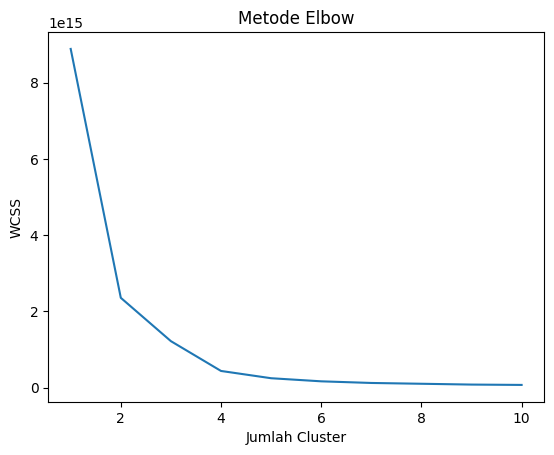

In [681]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Melakukan normalisasi data
X = df
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi training dan testing
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Menentukan jumlah cluster yang optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

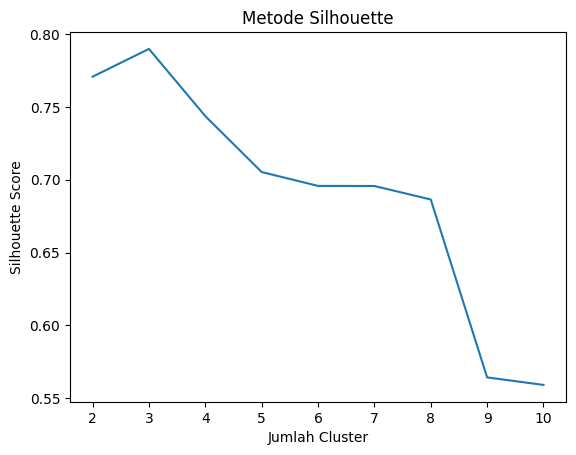

In [682]:
# Menentukan jumlah cluster yang optimal dengan metode silhouette
from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, n_init='auto').fit(X_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_train, labels, metric = 'euclidean'))
plt.plot(range(2, kmax+1), sil)
plt.title('Metode Silhouette')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Setelah itu, kita menentukan jumlah cluster yang optimal dengan menggunakan metode elbow dan silhouette. Pada contoh kode di atas, saya menggunakan jumlah cluster sebanyak 4 karena telah ditemukan sebagai jumlah cluster yang optimal.

In [683]:
# Menggunakan algoritma K-Means dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(X_train)

# Menambahkan kolom cluster ke dalam dataframe
X_train['cluster'] = kmeans.labels_

# Melihat hasil clustering pada setiap cluster
print(X_train.groupby('cluster').mean())

              usia   pengeluaran  status_perkawinan
cluster                                            
0        38.454388  2.125916e+06           0.635597
1        31.320375  2.155540e+05           0.445679
2        59.044444  7.179458e+06           0.911111


### Model Testing

Lakukan Evaluasi terhadap model anda!

In [684]:
# Lakukan Evaluasi terhadap Model anda menggunakan Skor Silhouette
from sklearn.metrics import silhouette_score

# Melakukan prediksi cluster dengan K-Means
clusters = kmeans.predict(X_test)

# Menghitung skor silhouette
silhouette_avg = silhouette_score(X_test, clusters)

print("Skor Silhouette untuk model K-Means adalah:", silhouette_avg)

Skor Silhouette untuk model K-Means adalah: 0.7792082351817138


### Data Visualization

Tampilkan Cluster anda menggunakan plot, boleh scatterplot atau heatmap.

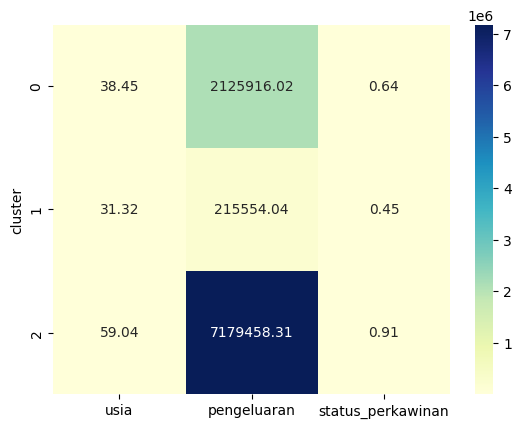

In [685]:
# Visualisasikan Cluster anda disini
# Menggunakan heatmap karena menggunakan lebih dari 2 variabel
import seaborn as sns

# create heatmap to visualize cluster means for each variable
sns.heatmap(X_train.groupby('cluster').mean(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

### Kesimpulan

Hasil analisis K-Means menunjukkan bahwa data pelanggan telah dikelompokkan menjadi tiga klaster berdasarkan variabel usia, pengeluaran, dan status_perkawinan.

Klaster 0 memiliki rata-rata usia sebesar 38.45 tahun, rata-rata pengeluaran sebesar 2.125.916 juta rupiah per bulan untuk produk rumah tangga, dan mayoritas pelanggan belum menikah (status_perkawinan = 0).

Klaster 1 memiliki rata-rata usia sebesar 31.32 tahun, rata-rata pengeluaran sebesar 215.554 ribu rupiah per bulan untuk produk rumah tangga, dan mayoritas pelanggan belum menikah (status_perkawinan = 0).

Klaster 2 memiliki rata-rata usia sebesar 59.04 tahun, rata-rata pengeluaran sebesar 7.179.458 juta rupiah per bulan untuk produk rumah tangga, dan mayoritas pelanggan sudah menikah (status_perkawinan = 1).

Dari hasil analisis K-Means, dapat disimpulkan bahwa klaster 0 dan klaster 1 memiliki kemiripan dalam hal status perkawinan dan pengeluaran, namun berbeda dalam hal usia. Sementara itu, klaster 2 memiliki karakteristik yang berbeda dari kedua klaster sebelumnya, dengan usia yang lebih tua dan pengeluaran yang jauh lebih tinggi.

Perusahaan dapat menggunakan hasil analisis ini untuk mengembangkan strategi pemasaran yang lebih efektif dan sesuai dengan karakteristik masing-masing klaster. Misalnya, untuk klaster 2, perusahaan dapat menawarkan produk-produk dengan harga yang lebih tinggi atau berkualitas lebih baik, sementara untuk klaster 0 dan 1, perusahaan dapat menawarkan produk-produk dengan harga yang lebih terjangkau.







